 #  Introduction
 
 
In this kernal I will conduct a regular season analysis on NCAA tournament for seasons 2012 - 2019. I will ask series of question of the data, with the aim of better understanding the dataset provided.
The results and answers to these questions will be displayed using packages provided by python. The questions will be :

1a. Does a winning team score more points when playing at home, than when playing at either a neutral ground or an away ground?

1b. Does a losing team score more points when playing at home, than when playing at either a neutral ground or an away ground?

2. Is there a difference between how many matches played at home, away or a neutral location?

3. As the season progresses how does the points scored (average) change? and how does it change from season to season?


4. Does a team score more points when playing at home, away or a neutral location?

5. Does a team score more three pointers when playing at home, away or a neutral location?

6. Does a team have more turnovers when playing at home, away or a neutral location?

7. Ranking the top 15 teams in a season by the number of points scored in a season


In [923]:
#Packages imported to be used for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython import display
from ipywidgets import interact, widgets


In [924]:
capstone.WScore.describe()

count    87366.000000
mean        75.430282
std         11.135159
min         34.000000
25%         68.000000
50%         75.000000
75%         82.000000
max        144.000000
Name: WScore, dtype: float64

In [925]:
capstone.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WTeamName,LTeamName
0,2003,10,1104,68,1328,62,N,0,27,58,...,22,10,22,8,18,9,2,20,alabama,oklahoma
1,2003,10,1272,70,1393,63,N,0,26,62,...,20,20,25,7,12,8,6,16,memphis,syracuse
2,2003,11,1266,73,1437,61,N,0,24,58,...,23,31,22,9,12,2,5,23,marquette,villanova
3,2003,11,1296,56,1457,50,N,0,18,38,...,15,17,20,9,19,4,3,23,northern-illinois,winthrop
4,2003,11,1400,77,1208,71,N,0,30,61,...,27,21,15,12,10,7,1,14,texas,georgia


## Question 1
a. Does a winning team score more points when playing at home than when playing at either a neutral ground or an away ground?

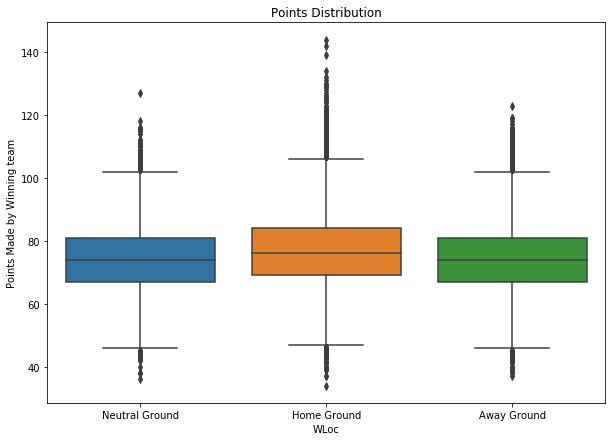

In [926]:
capstone= pd.read_csv("mens-machine-learning-competition-2019/Prelim2019_RegularSeasonDetailedResults.csv")
cap = pd.read_csv("mens-machine-learning-competition-2019/TeamSpellings.csv",encoding ="latin")
fig,ax1 = plt.subplots(1,1)
fig.set_size_inches(10,7)

capstone_plot= sns.boxplot(data = capstone, x= 'WLoc',y ='WScore')

ax1.set_title("Points Distribution")
ax1.set_xticklabels(['Neutral Ground',"Home Ground","Away Ground" ])
ax1.set_ylabel('Points Made by Winning team')
plt.show()

## Conclusion
The average number of points for the winning team at the home ground is larger than the away and the neutral grounds. 

## Question 1
b. Does a losing team score more points when playing at home than when playing at either a neutral ground or an away ground?

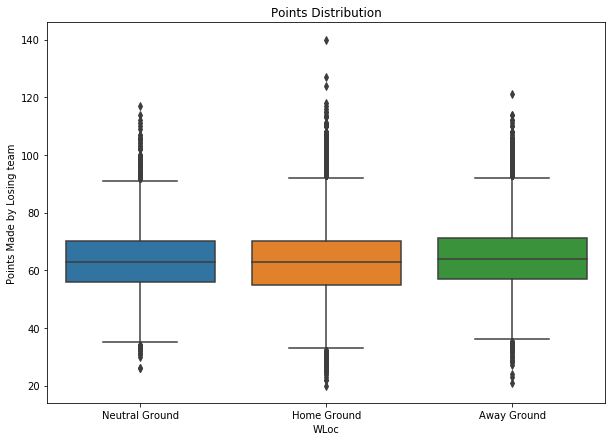

In [927]:
capstone= pd.read_csv("mens-machine-learning-competition-2019/Prelim2019_RegularSeasonDetailedResults.csv")
cap = pd.read_csv("mens-machine-learning-competition-2019/TeamSpellings.csv",encoding ="latin")
fig,ax1 = plt.subplots(1,1)
fig.set_size_inches(10,7)

capstone_plot= sns.boxplot(data = capstone, x= 'WLoc',y ='LScore')

ax1.set_title("Points Distribution")
ax1.set_xticklabels(['Neutral Ground',"Home Ground","Away Ground" ])
ax1.set_ylabel('Points Made by Losing team')
plt.show()

There seems to be no difference to the average number of points scored by the losing team when playing in either of the neutral, home or away locations. 

## Question 2

2. What is the difference between matches played either home, away or a neutral location?

In [928]:
pd.DataFrame(capstone.WLoc.value_counts(normalize=True))

,WLoc
H,0.593148
A,0.306263
N,0.100588


In [929]:
groupHome= capstone.groupby("Season").WLoc.value_counts(normalize=True)

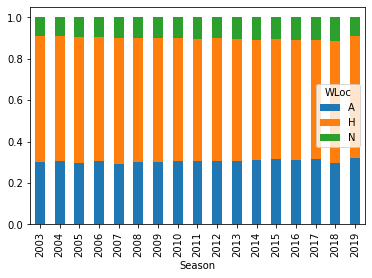

In [930]:
groupHome.unstack().plot(kind='bar',stacked=True)


## Conclusion
The proportion of all games played at home, away and in a neutral ground were all similar across all seasons.The graphs also show that more matches were played at home than at away and neutral locations in a given season.

## Question 3
3. As the season progresses how does the points scored (average) change? and how does it change from season to season?

In [931]:
# The first thing to do is to associate TeamID to the name of the team. This will help us put a name to the team
dic = {}
for i in range(0,len(cap["TeamID"])):
    dic[cap["TeamID"][i]]=cap['TeamNameSpelling'][i]
capstone["WTeamName"]=[dic[teamid] for teamid in capstone['WTeamID']]
capstone["LTeamName"]=[dic[teamid] for teamid in capstone['LTeamID']]

In [932]:
capstone.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WTeamName,LTeamName
0,2003,10,1104,68,1328,62,N,0,27,58,...,22,10,22,8,18,9,2,20,alabama,oklahoma
1,2003,10,1272,70,1393,63,N,0,26,62,...,20,20,25,7,12,8,6,16,memphis,syracuse
2,2003,11,1266,73,1437,61,N,0,24,58,...,23,31,22,9,12,2,5,23,marquette,villanova
3,2003,11,1296,56,1457,50,N,0,18,38,...,15,17,20,9,19,4,3,23,northern-illinois,winthrop
4,2003,11,1400,77,1208,71,N,0,30,61,...,27,21,15,12,10,7,1,14,texas,georgia


In [933]:
AvgPoint=capstone.groupby("DayNum").WScore.mean()

In [934]:
def plotyear(Season):
    Avg=pd.DataFrame(capstone[capstone.Season == Season].groupby("DayNum").WScore.mean().reset_index())
    Avg.plot.scatter('DayNum','WScore',
                      
                      linewidths=1,edgecolors='k',
                      figsize=(12,9))
    
    plt.axis(ymin=50,ymax=100,xmin=0,xmax=150)
    plt.xlabel('Progression of Season')
    plt.ylabel('Points Scored')

In [935]:
pd.DataFrame(capstone[capstone.Season == 2003].groupby("DayNum").WScore.mean()).reset_index()

,DayNum,WScore
0,10,69.000000
1,11,71.750000
2,12,77.500000
3,13,80.500000
4,14,76.181818
...,...,...
115,128,69.928571
116,129,73.066667
117,130,73.000000
118,131,71.842105


In [936]:
interact(plotyear,Season=widgets.IntSlider(min=2003,max=2019,step=1,value=2003))

interactive(children=(IntSlider(value=2003, description='Season', max=2019, min=2003), Output()), _dom_classes…

<function __main__.plotyear(Season)>

## Conclusion

The general trend is that as the season progresses the points scored tends to decrease. This pattern is generally the same across all seasons

## Question 4 

4. What is the variation in the points scored per season? This is given the fact that a team is playing at home, away or a neutral location.

In [937]:
Home = capstone[capstone.WLoc == 'H']
Away = capstone[capstone.WLoc == 'A']
Neutral = capstone[capstone.WLoc == 'N']

In [938]:
AvgH=Home.groupby("Season").WScore.mean()

AvgA=Away.groupby("Season").WScore.mean()

AvgN=Neutral.groupby("Season").WScore.mean()

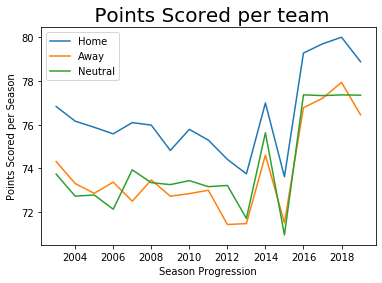

In [939]:
A=plt.plot(AvgH.index,AvgH)
B=plt.plot(AvgA.index,AvgA)
C=plt.plot(AvgN.index,AvgN)


plt.xlabel('Season Progression')
plt.ylabel('Points Scored per Season')
plt.title(' Points Scored per team', size=20)
plt.legend(["Home", "Away","Neutral"],loc=0)
plt.show()


## Conclusion
For most seasons the number of points scored by the winning team while playing at home is greater than points scored when playing at an away or a neutral location.

## Question 5

5. Does a team score more three-pointers when playing at home, away or a neutral location?

In [940]:
AvgH3=Home.groupby("Season").WFGM3.mean()

AvgA3=Away.groupby("Season").WFGM3.mean()

AvgN3=Neutral.groupby("Season").WFGM3.mean()

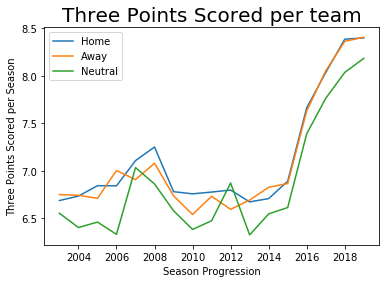

In [941]:
A3=plt.plot(AvgH3.index,AvgH3)
B3=plt.plot(AvgA3.index,AvgA3)
C3=plt.plot(AvgN3.index,AvgN3)


plt.xlabel('Season Progression')
plt.ylabel('Three Points Scored per Season')
plt.title('Three Points Scored per team', size=20)
plt.legend(["Home", "Away","Neutral"],loc=0)
plt.show()

## Conclusion

For most seasons the number of three-pointers scored by the winning team while playing at home is greater than three pointers scored when playing at an away, or a neutral location.

## Question 6
6. Does a team commit more turnovers at home than away

In [942]:
AvgHTO=Home.groupby("Season").WTO.mean()

AvgATO=Away.groupby("Season").WTO.mean()

AvgNTO=Neutral.groupby("Season").WTO.mean()

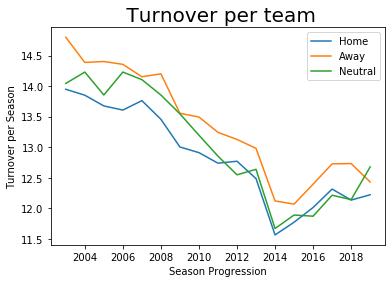

In [943]:
ATO=plt.plot(AvgHTO.index,AvgHTO)
BTO=plt.plot(AvgATO.index,AvgATO)
CTO=plt.plot(AvgNTO.index,AvgNTO)


plt.xlabel('Season Progression')
plt.ylabel('Turnover per Season')
plt.title(' Turnover per team', size=20)
plt.legend(["Home", "Away","Neutral"],loc=0)
plt.show()

##  Conclusion

For all seasons the number of turnovers conceeded while playing at an away location is greater than turnovers conceeded when playing at an home or a neutral location.

## Question 7

7. Ranking the top 15 teams by the  no. of points scored in a season

In [947]:
Teams =capstone["WTeamName"].unique()
for year in range(2003,2019):
    points_dict  = {team:0 for team in Teams}
    results = capstone[capstone["Season"]==year]
    results.reset_index()
    for i in range(0,len(results)):
        points_dict[capstone['WTeamName'][i]] += capstone["WScore"][i]
        points_dict[capstone['LTeamName'][i]] += capstone["LScore"][i]
        

In [962]:
Ranks

{1: 'utah-valley-state',
 2: 'uc-davis',
 3: 'longwood',
 4: 'northern-colorado',
 5: 'south-dakota-state',
 6: 'kennesaw-state',
 7: 'north-dakota-state',
 8: 'north-florida',
 9: 'njit',
 10: 'central-arkansas',
 11: 'winston-salem-state',
 12: 'florida-gulf-coast',
 13: 'csu-bakersfield',
 14: 'north-carolina-central',
 15: 'presbyterian',
 16: 'usc-upstate',
 17: 'houston-baptist',
 18: 'north-dakota',
 19: 'southern-illinois-edwardsville',
 20: 'bryant university',
 21: 'seattle-u',
 22: 'south-dakota',
 23: 'omaha',
 24: 'northern-ky',
 25: 'grand-canyon',
 26: 'umass-lowell',
 27: 'incarnate-word',
 28: 'abilene-christian',
 29: 'california baptist',
 30: 'north alabama',
 31: 'morris-brown',
 32: 'nicholls-state',
 33: 'army-west-point',
 34: 'columbia',
 35: 'portland-state',
 36: 'dartmouth',
 37: 'the-citadel',
 38: 'miami-ohio',
 39: 'ark-pine-bluff',
 40: 'north-carolina-at',
 41: 'uc-riverside',
 42: 'southeastern-louisiana',
 43: 'east-carolina',
 44: 'umes',
 45: 'navy'

In [960]:
Ranks={key:rank for key, rank in enumerate (sorted(points_dict,key=points_dict.get),1)}


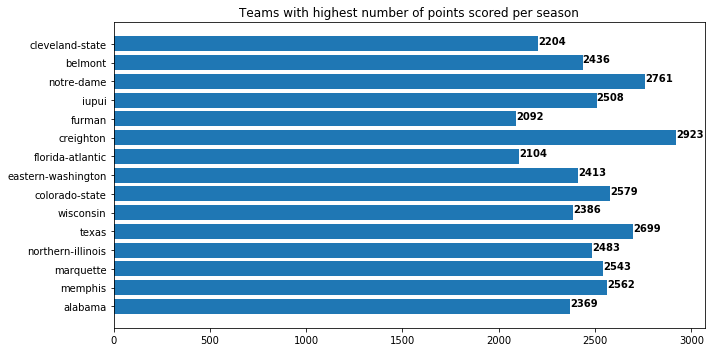

In [966]:
Rank = {A:N for (A,N) in [x for x in points_dict.items()][:15]}

labels = []
numbers = []
total = 0
for key, value in Rank.items():
    labels.append(key)
    numbers.append(value)
    total += value
index = np.arange(len(labels))
plt.figure(figsize=(10,5))

plt.barh(index,numbers)
for i, v in enumerate(numbers):
    plt.text(v + 0.2, i , str(v), color='black', fontweight='bold')
plt.yticks(index, labels, fontsize=10, rotation=0)

plt.title("Teams with highest number of points scored per season")
plt.tight_layout()
plt.show()


## Conclusion
Creighton scored the most amount of points per season.

The next question to ask is how did these teams with the most amount of points scored perform in terms of how much win they accumulated during the season

## Question 8

8.How did the teams with the highest points scored per season while playing at home compare with the number of wins during the season

## Question 9

9.How did the teams with the highest turnover scored per season compare with their wins during the season

#AvgHTO_list=list(AvgHTO.values())
#AvgHTO_list = list(AvgHTO.index)


num1 = list(AvgHTO.index)
#num2 = list(AvgATO.index)
#num3 = list(AvgNTO.index)


x_indexes1 =np.arange(len(num1))
x_indexes2 =np.arange(len(num2))
x_indexes3 =np.arange(len(num3))



barWidth = 0.25
plt.bar(x_indexes1+barWidth, AvgATO.values.flatten(),edgecolor='white',width=barWidth)
plt.bar(x_indexes1, AvgATO.values.flatten(),edgecolor='white',width=barWidth)
plt.bar(x_indexes1-barWidth, AvgNTO.values.flatten(),edgecolor='white',width=barWidth)



plt.xlabel('Season Progression')
plt.ylabel('Turnover per Season')
plt.title(' Turnover per team', size=20)
plt.legend(["Home", "Away","Neutral"],loc=0)

plt.xticks(ticks=x_indexes1,labels = num1)
plt.figure(figsize=(10,5))